In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
df_emails = pd.read_csv('https://raw.githubusercontent.com/liadmagen/Modeling_course/main/data/spam_or_not_spam.csv', encoding="UTF-8")
df_emails.tail()

,email,label
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1
2999,hello this is chinese traditional 子 件 NUMBER世...,1


In [3]:
############## YOUR TURN ##############
# Divide the data into training and test set using sklearn's train_test_split.
# use the colunm 'email' for the training data
# use the column 'label' as the target y
X = df_emails.loc[:,['email']]
y = df_emails.loc[:,['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
########################################

In [4]:
# Create Pre-processing pipeline and a Multinomial Naive Bayes classifier.

# CountVectorizer calculates the frequency of words in the dataset (how often they appear)
# TfidfTransformer calculates the frequency of a word in this document, divided by their frequency over ALL the documents.

# MultinomialNB is a Naive Bayes classifier assuming a multinomial distribution
spam_classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()), ])


In [5]:
spam_classifier.fit(X_train['email'].astype('U'), y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [6]:
y_preds = spam_classifier.predict(X_test['email'].astype('U'))


In [7]:
print(metrics.classification_report(y_test, y_preds, target_names=["Spam","Not Spam"]))

              precision    recall  f1-score   support

        Spam       0.87      1.00      0.93       505
    Not Spam       1.00      0.19      0.32        95

    accuracy                           0.87       600
   macro avg       0.93      0.59      0.62       600
weighted avg       0.89      0.87      0.83       600



<Axes: >

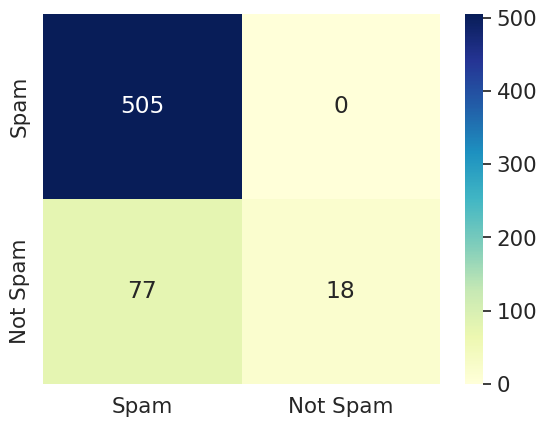

In [8]:
conf_mat = metrics.confusion_matrix(y_test, y_preds)
df_cm = pd.DataFrame(conf_mat, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")


In [9]:
print(metrics.matthews_corrcoef(y_test, y_preds))

0.4054699249153405


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

        Spam       0.91      1.00      0.95       505
    Not Spam       1.00      0.46      0.63        95

    accuracy                           0.92       600
   macro avg       0.95      0.73      0.79       600
weighted avg       0.92      0.92      0.90       600



<Axes: >

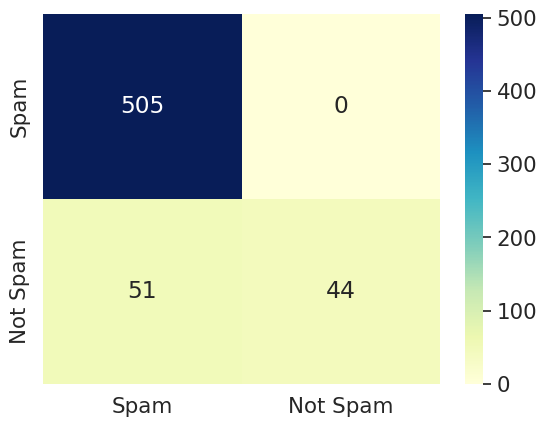

In [10]:
### Your turn ###

spam_classifier_CNB = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', ComplementNB()), ])
spam_classifier_CNB.fit(X_train['email'].astype('U'), y_train)
y_preds_CNB = spam_classifier_CNB.predict(X_test['email'].astype('U'))

print(metrics.classification_report(y_test, y_preds_CNB, target_names=["Spam","Not Spam"]))
conf_mat_CNB = metrics.confusion_matrix(y_test, y_preds_CNB)
df_cm_CNB = pd.DataFrame(conf_mat_CNB, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm_CNB, annot=True, fmt='d', cmap="YlGnBu")
##################

In [11]:
print(metrics.matthews_corrcoef(y_test, y_preds_CNB))

0.6485938537529389


In [12]:
spam_classifier_CNB.get_params()

{'memory': None,
 'steps': [('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
  ('clf', ComplementNB())],
 'verbose': False,
 'vect': CountVectorizer(),
 'tfidf': TfidfTransformer(),
 'clf': ComplementNB(),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': None,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf__use_idf': True,
 'clf__alpha': 1.0,
 'clf__class_prior': None,
 'clf__fit_prior': True,
 'clf__force_alpha': True,
 'clf__norm': False}

In [13]:
spam_classifier_CNB.set_params(clf__alpha=0.1)

clf_alpha = [0.05, 0.1, 0.2, 0.3] #I used numbers like 1.5, 2 and even 10 but the 0.1 scored better, so I tried a lower range
best_alpha = None
best_score = 0
for alpha in clf_alpha:
    spam_classifier_CNB.set_params(clf__alpha=alpha)
    spam_classifier_CNB.fit(X_train['email'].astype('U'), y_train)
    y_preds_CNB = spam_classifier_CNB.predict(X_test['email'].astype('U'))
    score = metrics.matthews_corrcoef(y_test, y_preds_CNB)
    print (f"Alpha: {alpha}, MCC: {score}")
    if score > best_score:
        best_score = score
        best_alpha = alpha
print (f"\nBest alpha is {best_alpha} with MCC {best_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Alpha: 0.05, MCC: 0.9686186405932369


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Alpha: 0.1, MCC: 0.9685455566755944


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Alpha: 0.2, MCC: 0.9173307097057828


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Alpha: 0.3, MCC: 0.904330561897687

Best alpha is 0.05 with MCC 0.9686186405932369


In [14]:
#trying to implement Random Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha_parameter = {'clf__alpha': uniform(0, 10)}
random_search = RandomizedSearchCV(spam_classifier_CNB, param_distributions=alpha_parameter, n_iter=10, cv=5)
random_search.fit(X_train['email'].astype('U'), y_train)
print (f"\nBest alpha is {random_search.best_params_} with MCC {random_search.best_score_}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


Best alpha is {'clf__alpha': 0.3179119730276492} with MCC 0.9629166666666666


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Interesting that the best alpha is changing everytime I run the cell, I guess it has to do with the randomness. Also, I don't quite understand why I'm getting a DataConversionWarning this whole time. I tried ravel(), but still it didn't help.

## Bonus: Try another model

Try comparing your achieved results with another model (kNN, Decision Tree, Random Forest). Hint: you'll need to still use the TFIDF.

Which model yield the best results?

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

        Spam       0.95      0.95      0.95       505
    Not Spam       0.73      0.75      0.74        95

    accuracy                           0.92       600
   macro avg       0.84      0.85      0.84       600
weighted avg       0.92      0.92      0.92       600

0.6900396229684927


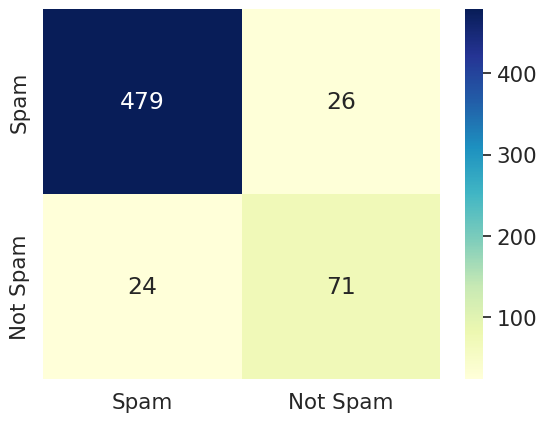

In [16]:
#Decision Tree
clf_decision_tree = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', DecisionTreeClassifier(max_depth =2, random_state=42)), ])
clf_decision_tree.fit(X_train['email'].astype('U'), y_train)
y_preds_decision_tree = clf_decision_tree.predict(X_test['email'].astype('U'))

print(metrics.classification_report(y_test, y_preds_decision_tree, target_names=["Spam","Not Spam"]))
conf_mat_decision_tree = metrics.confusion_matrix(y_test, y_preds_decision_tree)
df_cm_decision_tree = pd.DataFrame(conf_mat_decision_tree, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm_decision_tree, annot=True, fmt='d', cmap="YlGnBu")
print(metrics.matthews_corrcoef(y_test, y_preds_decision_tree))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

        Spam       0.98      1.00      0.99       505
    Not Spam       1.00      0.88      0.94        95

    accuracy                           0.98       600
   macro avg       0.99      0.94      0.96       600
weighted avg       0.98      0.98      0.98       600

0.9302478578913166


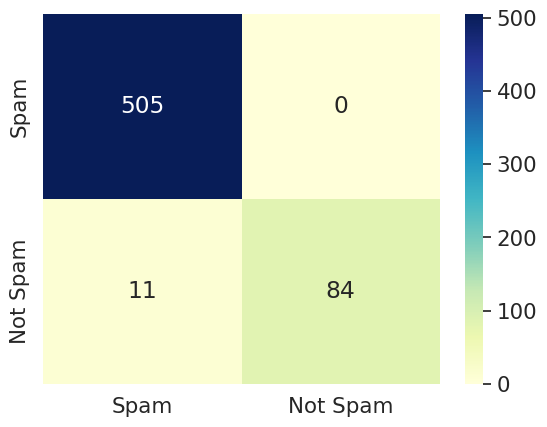

In [17]:
#Random Forest
clf_random_forest = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42))])
clf_random_forest.fit(X_train['email'].astype('U'), y_train)
y_preds_random_forest = clf_random_forest.predict(X_test['email'].astype('U'))

print(metrics.classification_report(y_test, y_preds_random_forest, target_names=["Spam","Not Spam"]))
conf_mat_random_forest = metrics.confusion_matrix(y_test, y_preds_random_forest)
df_cm_random_forest = pd.DataFrame(conf_mat_random_forest, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm_random_forest, annot=True, fmt='d', cmap="YlGnBu")
print(metrics.matthews_corrcoef(y_test, y_preds_random_forest))